# Part II - (DETERMINANTS OF LOAN BORROWING AND PAYMENT)
## by (ANITA AKELO)


## Investigation Overview

> The general objective of this project is to study the determinants that contribute to loan borrowing and payment and to answer some key questions like what factors influence a loan’s outcome.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others describing loan payment and borrowing.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')


In [3]:
# drop some columns that have unique values
loans.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled"],inplace= True )

In [4]:
# changing the datatype for the 'ListingcreationDate' variable to datetime
loans['ListingCreationDate']= pd.to_datetime(loans['ListingCreationDate'])

In [5]:
# convert ProsperRating into ordered categorical types
credit_classes = ['AA', 'A', 'B', 'C', 'D','E','HR']
classes = pd.api.types.CategoricalDtype(ordered = True, categories = credit_classes)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(classes)


In [6]:
# creating a dataset  with the monthly income of approximately 12500 and below
salary= (loans['StatedMonthlyIncome'] <= 12500)
loans_1= loans.loc[salary,:];

## Distribution of MonthlyLoanPayment

The distribution is highly skewed to the right with a lot of borrowers paying little and few pay much. When plotted in log scale the distribution is a multimodal and have a big spike between 150 to 200 and one before 400

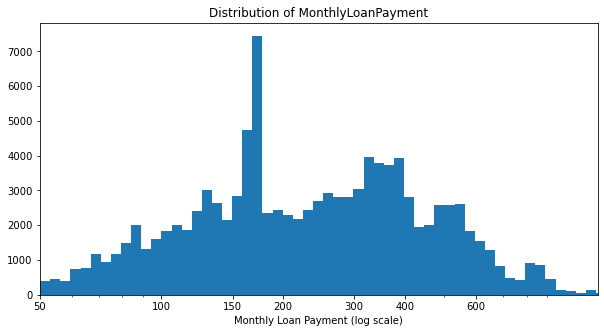

In [7]:
bins = 10**np.arange(0,np.log10(loans.MonthlyLoanPayment.max())+0.025,0.025)
plt.figure(figsize=[10,5])
plt.hist(x=loans.MonthlyLoanPayment,bins=bins);
plt.title('Distribution of MonthlyLoanPayment')
plt.xscale('log')
plt.xticks([50, 100, 150, 200, 300, 400,600], ['50', '100', '150', '200', '300', '400','600'])
plt.xlim([50,1200])
plt.xlabel("Monthly Loan Payment (log scale)");

## Distribution of loan original amount
The distribution is multimodial with spikes at 5K, 10k,20k and 25k. These are multiples of 5. Some borrowers ask for multiples of 5 or fractions of 5.

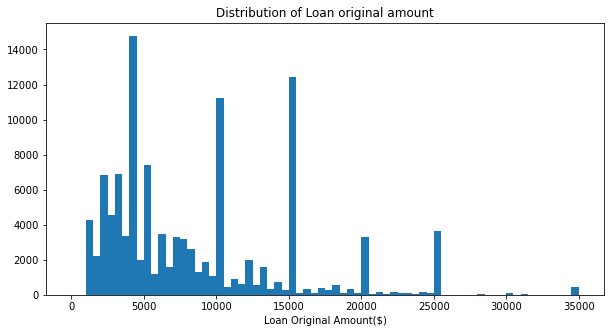

In [8]:
bins = np.arange(0,loans.LoanOriginalAmount.max()+500,500)
plt.figure(figsize=[10,5])
plt.hist(x=loans.LoanOriginalAmount,bins=bins);
plt.title('Distribution of Loan original amount')
plt.xlabel("Loan Original Amount($)");

## Distribution of loans across each loan status

LoanStatus('current') has the most number of counts. Few borrowers have passed due and almost pay in time and there is about 3000 defaulted.

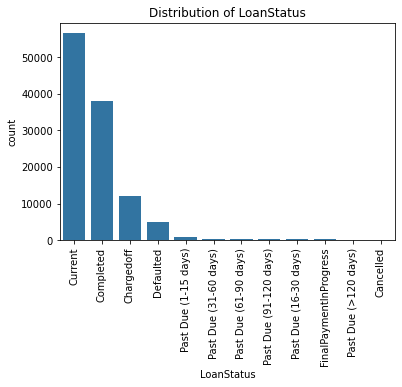

In [9]:
base_color = sb.color_palette()[0]
sb.countplot(data = loans, x= 'LoanStatus', order=loans.LoanStatus.value_counts().index, color = base_color)
plt.title('Distribution of LoanStatus')
plt.xticks(rotation=90);

## Monthly income, monthly loan payment and loan amount by loan status

Borrowers that passed their due date have a lower income but that is true from past due 1-15 days and borrowers that passed their due date > 120 days have a short distribution in monthly income.

There is a slight positive correlation between loan status and loan original amount in that: borrowers that pass their due date ask for a higher loan amount as compared to those who completed.

There is a negative correlation between monthly income and loan status in past due the lower the income, the more will be the delay in payment.

Borrowers who default have less loan original amount.

<Figure size 720x720 with 0 Axes>

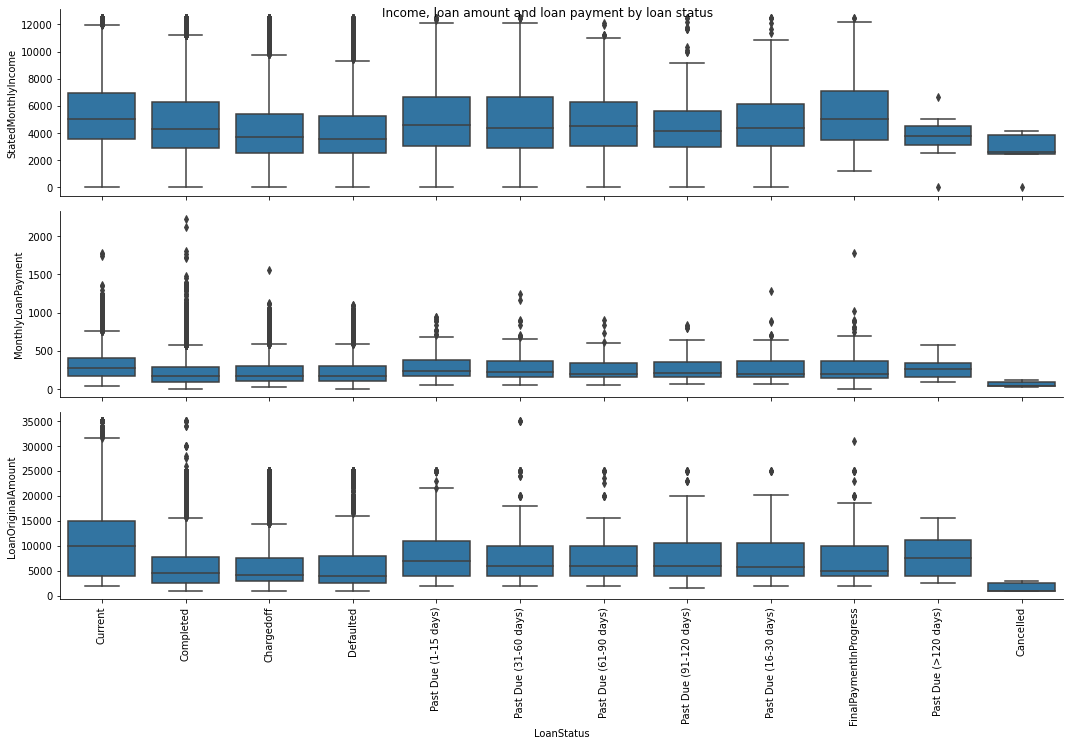

In [10]:
numeric_vars= ['StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
def boxplots(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color, order=loans_1.LoanStatus.value_counts().index)
    plt.xticks(rotation=90)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans_1, y_vars = numeric_vars, x_vars = 'LoanStatus',
                size = 3, aspect = 5)
g.map(boxplots)
g.fig.suptitle('Income, loan amount and loan payment by loan status')
plt.show();

## Prosper rating and score by BorrowerRate
There is a  strong correlation between the prosper rating and score with the borrower’s rate.As the score and rating improves, the interest rate shows a declining trend. This means that borrowers with better prosper score and rating are charged less interest for loans.

Text(0.5, 0, 'rating from best to worst')

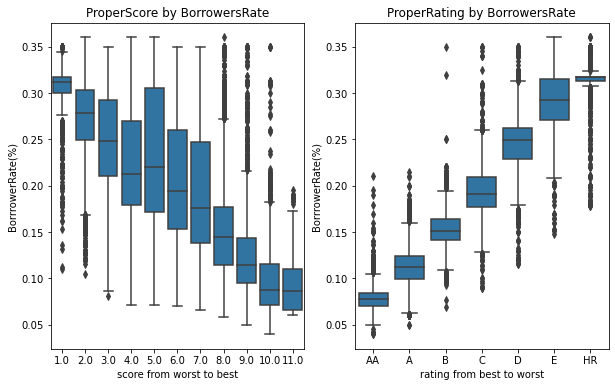

In [11]:

plt.figure(figsize=[10,6])
plt.subplot(1, 2, 1)
plt.title('ProperScore by BorrowersRate')
ax1=sb.boxplot(data = loans, x = 'ProsperScore', y = 'BorrowerRate', color=base_color)
plt.ylabel('BorrrowerRate(%)')
plt.xlabel('score from worst to best')


plt.subplot(1, 2, 2)
plt.title('ProperRating by BorrowersRate')
sb.boxplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color=base_color)
plt.ylabel('BorrrowerRate(%)')
plt.xlabel('rating from best to worst')

## Income, loan amount and loan payment by term and loan status
The plot shows that: 

The delay in repayment often occurs when the monthly income is low 

In all cases, the larger monthly loan payment of loans are made when the loan is for one year. 

Most borrowers who need a loan of high amount make it for 5 Years


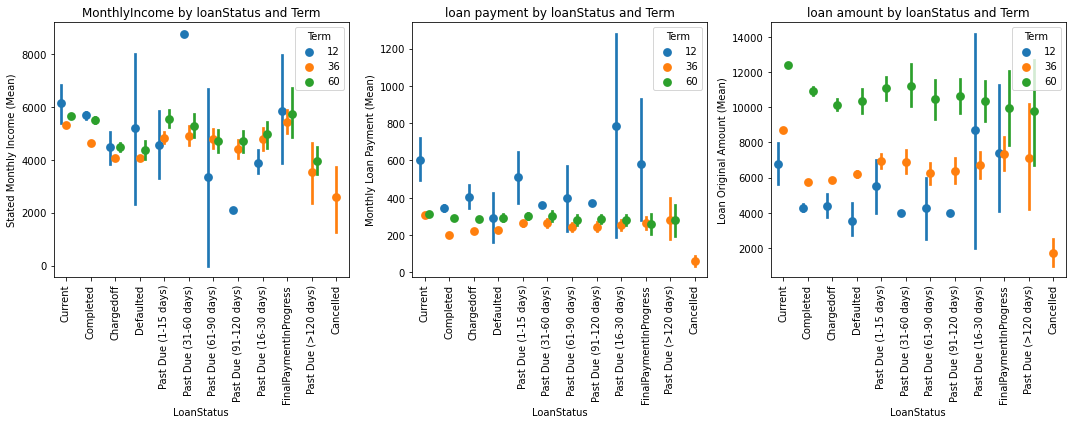

In [12]:
fig, ax = plt.subplots(ncols = 3, figsize = [15,6])

sb.pointplot(data = loans_1, x = 'LoanStatus', y = 'StatedMonthlyIncome', hue = 'Term',order=loans.LoanStatus.value_counts().index,
              linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('MonthlyIncome by loanStatus and Term')
ax[0].set_ylabel('Stated Monthly Income (Mean)')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(loans.LoanStatus.value_counts().index,rotation = 90)

sb.pointplot(data = loans_1, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'Term',order=loans.LoanStatus.value_counts().index,
              linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('loan payment by loanStatus and Term')
ax[1].set_ylabel('Monthly Loan Payment (Mean)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(loans.LoanStatus.value_counts().index,rotation = 90)
sb.pointplot(data = loans_1, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',order=loans.LoanStatus.value_counts().index,
              linestyles = '', dodge = 0.4, ax = ax[2])
ax[2].set_title('loan amount by loanStatus and Term')
ax[2].set_ylabel('Loan Original Amount (Mean)')
ax[2].set_yticklabels([],minor = True)
ax[2].set_xticklabels(loans.LoanStatus.value_counts().index,rotation = 90)

plt.tight_layout()
plt.show();